Proyeto final de la materia de Herramientas para el analisis de datos

El fin de este ejercicio es usar las técnicas aprendidas durante la clase, para realizar un análisis observatorio de las
características de AirBnB.

1.- Importamos las librerías necesarias para el análisis

2.- Adquirimos (cargamos) los datos del archivo CSV

In [110]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import plotly as pl
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [111]:
#Importamos los datos del archivo
origen = pd.read_csv("airbnb.csv")

3.- Preprocesamiento. Ahora verificaremos el estado actual de los datos para ver si es necesario eliminar datos innecesarios o rellenar datos faltantes 

In [112]:
origen

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,279,2019-08-29,4.62,1,192
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.59,1,13
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48372,38564068,Top Floor Delight,207204450,Ade,Brooklyn,Cypress Hills,40.67618,-73.90764,Entire home/apt,199,2,0,NaN,NaN,4,42
48373,38564524,Central Park Elegance,1567562,Maggie,Manhattan,Upper East Side,40.77326,-73.96650,Entire home/apt,175,30,0,NaN,NaN,1,263
48374,38566777,Quiet room available,159902221,Nancy,Brooklyn,Bushwick,40.69907,-73.93043,Private room,35,30,0,NaN,NaN,1,66
48375,38567542,Spacious room in Brooklyn brownstone,68905617,Eric,Brooklyn,Crown Heights,40.66986,-73.93772,Private room,79,1,0,NaN,NaN,10,322


In [113]:
#Verificamos el número de datos con los que estaremos trabajando
origen.shape

(48377, 16)

In [114]:
#Verificamos si existen datos vacíos
origen.isnull().sum()

id                                   0
name                                17
host_id                              0
host_name                           22
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       9651
reviews_per_month                 9651
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [115]:
origen["name"].unique()

array(['THE VILLAGE OF HARLEM....NEW YORK !',
       'Cozy Entire Floor of Brownstone',
       'Entire Apt: Spacious Studio/Loft by central park', ...,
       'Quiet room available', 'Spacious room in Brooklyn brownstone',
       'Petrose home by JFK, Beach &St John Hosp.'], dtype=object)

In [116]:
origen["host_name"].unique()

array(['Elisabeth', 'LisaRoxanne', 'Laura', ..., 'Gerda', 'Addis',
       'Ebangha'], dtype=object)

In [117]:
#Edificios más visitados, filtrado por nombre  
origen["name"].value_counts()

Home away from home                                   19
Hillside Hotel                                        18
New york Multi-unit building                          16
Loft Suite @ The Box House Hotel                      11
Brooklyn Apartment                                    10
                                                      ..
Large 1 bdrm with Modern finishes - Pelham Gardens     1
Quiet and Clean Room in Downtown Manhattan             1
Private bedroom in the heart of the UWS #1             1
Tiny Apt                                               1
McSimon's | Cozy Private Studio | Near NYC             1
Name: name, Length: 47419, dtype: int64

In [118]:
#Dueños de las habitaciones más visitadas
origen["host_name"].value_counts()

Michael         415
Sonder (NYC)    387
David           384
John            295
Alex            257
               ... 
Darragh           1
Jahni             1
5 Star Stays      1
Kitti             1
Said              1
Name: host_name, Length: 11333, dtype: int64

1. ¿Que tipo de alojamiento es el que mas hay (un cuarto, dept. completo, etc)?

In [119]:
#Usamos la función value_counts() para obtener el conteo de los tipos de alojamiento, de mayorv a menor
tipo=origen["room_type"].value_counts()

In [120]:
room_type = pd.DataFrame(tipo)

In [121]:
room_type

,room_type
Entire home/apt,24898
Private room,21852
Shared room,1192
Hotel room,435


2. ¿Cuales son los neighbourhoods con mas alojamientos?

In [124]:
#Usamos la función value_counts() para obtener el conteo de los vecindarios con mayor alojamiento, de mayorv a menor
origen["neighbourhood"].value_counts()

Williamsburg          3815
Bedford-Stuyvesant    3785
Harlem                2625
Bushwick              2411
Hell's Kitchen        1923
                      ... 
Willowbrook              1
Woodrow                  1
Rossville                1
Fort Wadsworth           1
Gerritsen Beach          1
Name: neighbourhood, Length: 224, dtype: int64

In [91]:
vecindario=origen["neighbourhood"].value_counts()

In [92]:
vecindario.head()

Williamsburg          3815
Bedford-Stuyvesant    3785
Harlem                2625
Bushwick              2411
Hell's Kitchen        1923
Name: neighbourhood, dtype: int64

3. Mostrar los top 5 alojamientos, mas ocupados (tip la columna availability_365 muestra cuantos dias esta disponible)

In [93]:
#Listamos el número de días que están disponibles los alojamientos, de mayor a menor número de veces que aparecen
origen["availability_365"].value_counts()

0      18431
365      774
255      390
1        386
2        311
       ...  
203       18
218       17
185       16
181       14
200       13
Name: availability_365, Length: 366, dtype: int64

In [94]:
#Filtramos usando la disponibilidad de cero (siempre ocupados)
alojamiento=np.where(origen["availability_365"]==0)

In [95]:
#Desplegamos los 5 primeros lugares obtenidos del filtro anterior
origen.loc[alojamiento].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0
6,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.97,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,161,2019-07-29,1.32,4,0
19,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0


4. Mostrar el mismo dato del punto 3 pero filtrado por neighbourhood

In [25]:
vecindario

Williamsburg          3815
Bedford-Stuyvesant    3785
Harlem                2625
Bushwick              2411
Hell's Kitchen        1923
                      ... 
Willowbrook              1
Woodrow                  1
Rossville                1
Fort Wadsworth           1
Gerritsen Beach          1
Name: neighbourhood, Length: 224, dtype: int64

In [29]:
vec = pd.DataFrame(vecindario)

In [32]:
vec.head()

,neighbourhood
Williamsburg,3815
Bedford-Stuyvesant,3785
Harlem,2625
Bushwick,2411
Hell's Kitchen,1923


5. Mostrar la distribución de los precios de los alojamientos.

<AxesSubplot:xlabel='room_type', ylabel='price'>

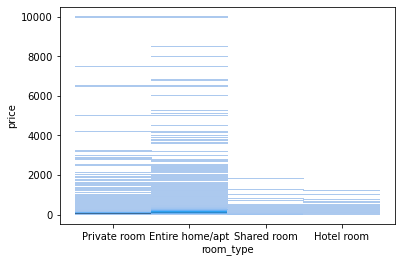

In [34]:
sns.histplot(data=origen, x=origen["room_type"],y=origen["price"],bins=10,binwidth=10)

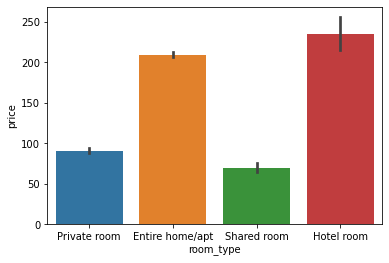

In [59]:
sns.barplot(x="room_type", y="price", data=origen)

6. ¿Donde se encuentran los alojamientos mas caros / baratos?

In [38]:
origen["neighbourhood_group"].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

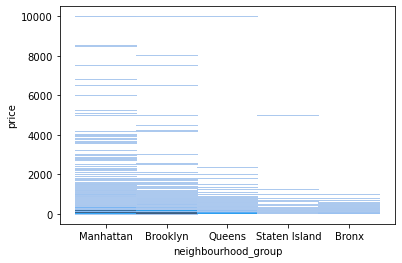

In [37]:
sns.histplot(data=origen,x=origen["neighbourhood_group"],y=origen["price"])

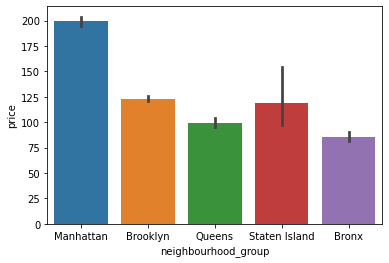

In [60]:
sns.barplot(x="neighbourhood_group", y="price", data=origen)

7. Mostrar los alojamientos en un mapa, filtrados por neighbourhood y por precio ( usar un slider )

8. ¿El precio de renta afecta cuantas veces se renta un lugar?

In [125]:
origen.pivot_table(values='price', index= 'availability_365', columns='neighbourhood')

neighbourhood,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
availability_365,,,,,,,,,,,,,,,,,,,,,
0,68.714286,41.0,NaN,106.666667,125.692722,107.25,212.842105,81.866667,178.5,102.5,...,40.0,40.0,67.666667,126.148621,NaN,137.986486,85.214286,50.0,700.0,77.73913
1,NaN,NaN,NaN,NaN,88.250000,NaN,NaN,37.000000,NaN,NaN,...,NaN,NaN,NaN,151.000000,NaN,NaN,NaN,NaN,NaN,47.75000
2,NaN,NaN,NaN,NaN,87.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,120.655172,NaN,NaN,NaN,NaN,NaN,49.00000
3,NaN,NaN,NaN,NaN,32.000000,NaN,195.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,126.111111,NaN,157.666667,NaN,NaN,NaN,126.00000
4,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,138.346154,NaN,175.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,NaN
362,NaN,NaN,65.0,230.000000,100.600000,NaN,225.000000,NaN,NaN,NaN,...,NaN,NaN,70.000000,375.000000,NaN,NaN,69.000000,NaN,NaN,78.00000
363,60.000000,NaN,NaN,275.000000,1350.000000,NaN,350.000000,80.000000,NaN,NaN,...,NaN,NaN,500.000000,238.333333,NaN,180.000000,69.000000,NaN,NaN,105.00000


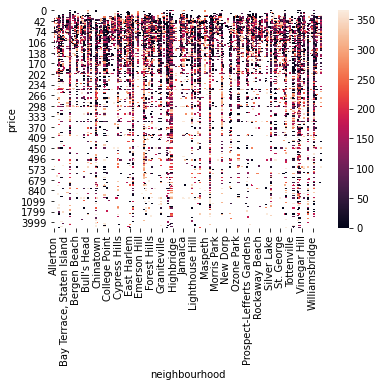

In [131]:
pv=origen.pivot_table(values='availability_365', index= 'price', columns='neighbourhood')
sns.heatmap(pv)

9. ¿El número de reviews afecta cuantas veces se renta un lugar?

10. ¿El neighbourhood influye en cuantas veces se renta un lugar?